<a href="https://colab.research.google.com/github/stephenkiilu/ASSOCIATION-CORRELATION-AND-HYPOTHESIS-TESTING-WITH-R/blob/main/Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Loading data
***

In [3]:
X = np.loadtxt('Xtr.csv', skiprows=1, usecols=(1,), dtype=str, delimiter=',')
y = np.loadtxt('Ytr.csv', skiprows=1, usecols=(1,), dtype=int, delimiter=',')
X_test = np.loadtxt('Xte.csv', skiprows=1, usecols=(1,), dtype=str, delimiter=',')
X_tr_vectors = np.loadtxt('Xtr_vectors.csv', skiprows=1, usecols=(1,), dtype=str, delimiter=',')
X_te_vectors = np.loadtxt('Xte_vectors.csv', skiprows=1, usecols=(1,), dtype=str, delimiter=',')

X_full = np.hstack([X, X_test])
y = 2*y - 1.

## Utility functions
---

In [25]:
def base2int(c):
    return {'A': 0, 'C': 1, 'G': 2, 'T': 3}.get(c, 1)

[base2int(c) for c in 'AACGGT']

[0, 0, 1, 2, 2, 3]

In [143]:
X_tr_vectors1 = np.loadtxt('Xtr_vectors.csv', skiprows=1, dtype=str, delimiter=',')
XX=X_tr_vectors1[:,1:]
YY=y
print(XX.shape)
print(YY.shape)

(2000, 64)
(2000,)


In [180]:
#all data
x_test=np.loadtxt('Xte_vectors.csv', skiprows=1, dtype=str, delimiter=',')[:,1:]
x_test
xx_train=X_tr_vectors1[:,1:]
x_test.shape
y

(1000, 64)

In [ ]:
Xtrain=X_tr_vectors1[:,1:]


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score


X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.33, random_state=42)
clf=LogisticRegression(random_state=0,C=10)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

accuracy_score(y_test, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.9590909090909091

In [138]:
from sklearn.svm import LinearSVC

# Parameters
C = 10

# Create the model
clf = LinearSVC(penalty='l2', loss='hinge', C=C)
# Train the model
clf.fit(X_train, y_train)
clf.__dict__

y_pred = clf.predict(X_test)


def error(y_pred, y_true):
    e = (y_pred != y_true).mean()
    return e


# w = clf.coef_[0]
# b = clf.intercept_[0]
# print('Model parameters:')
# print('w: {}'.format(w))
# print('b: {}'.format(b))


# Testing error
y_pred = clf.predict(X_test)
err_test = error(y_pred, y_test)
print('Testing error = {:.1%}'.format(err_test))


accuracy_score(y_test, y_pred)

Testing error = 4.4%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.956060606060606

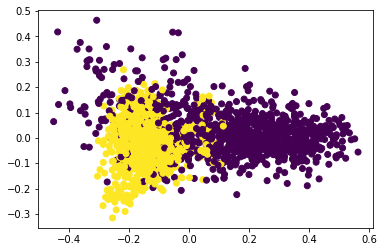

In [224]:
#PCA visualization
pca = PCA(n_components=5)
components = pca.fit_transform(xx_train)
plt.scatter(components[:,0],components[:,1],c=y)
# plt.scatter(components[:,2],components[:,4],c=y)

In [238]:
### predictions
clf=LogisticRegression(random_state=0,C=10)
clf.fit(xx_train,y)
predictions1=clf.predict(x_test)
predictions1.shape ## logistic


C = 1
clf1 = LinearSVC(penalty='l2', loss='hinge', C=10)
clf1.fit(xx_train,y)
clf1.fit(xx_train,y)
predictions2=clf1.predict(x_test)
predictions2.shape ## svm



err_test = error(predictions1,predictions2)
print('Testing error = {:.1%}'.format(err_test))


accuracy_score(predictions1,predictions2)
# accuracy_score(y_test, y_pred)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Testing error = 0.7%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


0.993

In [240]:
### saving
y_save = np.vstack([1 + np.arange(len(predictions2)), predictions2]).T
np.savetxt('sample_prediction2.csv', y_save,
           delimiter=',', header='Id,Covid', fmt='%i', comments='')

## Model Selection
***

In [261]:
from sklearn.svm import SVC
clf3=SVC(C=10)
clf3.fit(xx_train,y)
predictions3=clf3.predict(x_test)
accuracy_score(predictions3,preds)

0.503

In [256]:
preds=np.where(predictions3==1,1,0)

In [258]:
y_save = np.vstack([1 + np.arange(len(predictions3)), preds]).T
np.savetxt('sample_prediction3.csv', y_save,
           delimiter=',', header='Id,Covid', fmt='%i', comments='')

In [265]:
y_save[0:10]
predictions3[0:10]

array([-1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.])

In [273]:
preds1=np.where(predictions1==1,1,0)
y_save = np.vstack([1 + np.arange(len(predictions1)), preds1]).T
np.savetxt('sample_prediction4.csv', y_save,
           delimiter=',', header='Id,Covid', fmt='%i', comments='')


In [ ]:
# Split into X, y into training and validation sets
# Choose model(s)
# Tune parameters

Saving predictions
---
***

In [ ]:
# Predict labels
y_test = (np.random.rand(len(X_test)) < 0.5) # dummy predictions

In [ ]:
# Add the column of Ids
y_save = np.vstack([1 + np.arange(len(y_test)), y_test]).T
y_save[:10]

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  1],
       [ 6,  0],
       [ 7,  1],
       [ 8,  0],
       [ 9,  0],
       [10,  1]])

In [ ]:
# Save as a csv file
np.savetxt('sample_prediction.csv', y_save,
           delimiter=',', header='Id,Covid', fmt='%i', comments='')

`sample_prediction.csv` looks like this:
```
Id, Covid
1, 0
2, 0
.
.
.
1000, 1
```